In [ ]:
import pandas as pd
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_boston
house_price_data = load_boston()

In [ ]:
# Assumptions of Linear Regression

# 1. Linear Distribution 
# 2. Presence of Normality 
# 3. Auto Correlation 
# 4. HomoScedasticity
# 5. Multi Colinearity 

In [ ]:
# Example - The 2 input variables should not have correlation -
# Age 
# Gender 
# Insulin Level 
# Skin Thickness (cm)
# Skin thickness (mm)
# Weight

# Dia -

# Input should have a correalation with Output! 

# Input                     Output
# i1, i2, i3, i4, i5        o1
# i3 and i4 are highly correlated 


In [ ]:
type(house_price_data)

sklearn.utils.Bunch

In [ ]:
house_price_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
# data      - the input features/ independent variables (value)
# target    - the output feature 
# feature_names - the names of input features (column name)
# DESCR     - description of the dataset
# filename  - the CSV file where the data is saved! 

In [ ]:
house_price_data.filename

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/boston_house_prices.csv'

In [ ]:
print(house_price_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
house_price_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
house_price_data.target   # House Prices 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
house_price_data.data   # Input Data 
house_price_data.data.shape  # 506 rows and 13 input columns

(506, 13)

In [ ]:
# Create a dataframe for the data 
df = pd.DataFrame(data = house_price_data.data, columns=house_price_data.feature_names)
df["PRICE"] = house_price_data.target
df.head()   # historical data 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.tail(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
# ML LifeCycle 
# 1. Training   [Input, Output] ---> [ML Algo] ---> [Model]
# 2. Testing    [Input]         ---> [Model]   ---> [Output_predicted]
#    Compare Output_predicted with Output_actual
#    Comparition result(score) is Good so you move to step 3 or if results are bad you move back to step 1
# 3. Prediction 

In [ ]:
# Regression based algorithms can be applied only to data where output variables is cont. in nature

In [ ]:
#         |- (80%) Training dataset [404]
#   506 --| 
#         |- (20%) Testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:13], df["PRICE"], test_size=0.2)
#                                                   ----INPUT ------,  --OUTPUT--

In [ ]:
# a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)
# b_train, b_test, a_train, a_test = train_test_split(b, a, test_size=0.2)

In [ ]:
x_train.shape # (404, 13)

(404, 13)

In [ ]:
y_train.shape

(404,)

In [ ]:
x_test.shape, y_test.shape

((102, 13), (102,))

In [ ]:
# [Input ,Output] ---> [train_test_split] ---> TRAINING[Input, Output]  ,TESTING[Input, Output]
#                                            [x_train, y_train]         ,[x_test, y_test]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
286,0.01965,80.0,1.76,0.0,0.385,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93
297,0.14103,0.0,13.92,0.0,0.437,5.790,58.0,6.3200,4.0,289.0,16.0,396.90,15.84
227,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
361,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19


In [ ]:
# Test the model 
y_pred = lr.predict(x_test)
# Here the model lr is trying to predict the house price of x_test 
# y_test - the actual prices of the x_test 
# y_pred - is the price predicted by model

In [ ]:
y_pred

array([20.23076281, 20.3903234 , 19.81736458, 32.62029549, 18.30497392,
       25.59998533, 10.73293289, 21.40534522, 32.39331282, 28.75809383,
        6.90948059, 22.74309601, 20.90951156, 39.43642858, 38.85990085,
       16.92995266, 21.11334881, 15.35001701, 23.01787489, 22.07626247,
       32.2149284 , 18.32631236, 20.37685109, 14.19360114, 34.78822898,
       25.2649902 ,  9.74357821, 25.19890249, 13.65195173, 25.77335602,
       15.81975503, 37.2474096 , 31.96555222, 19.81473662, 29.20752631,
       20.79780793, 19.87385761, 13.03442725, 22.04596155, 17.86534847,
       40.43972515, 25.28887593, 22.27860306, 27.11654909, 22.62348312,
       27.95923063, 36.12508386,  9.61542053, 24.44271965, 22.31212783,
       21.17223976, 25.65452917, 31.19113495, 28.56218996, 13.5391735 ,
       15.43007412, 31.09128319, 24.30571682, 17.59962955, 10.58106306,
       21.82993643, 16.0036217 , 22.1359951 , 27.27238459, 20.62029191,
       17.45933614, 20.51112727, 15.08239163, 21.24498646, 18.41

In [ ]:
y_test

493    21.8
286    20.1
297    20.3
227    31.6
361    19.9
       ... 
311    22.1
197    30.3
439    12.8
235    24.0
384     8.8
Name: PRICE, Length: 102, dtype: float64

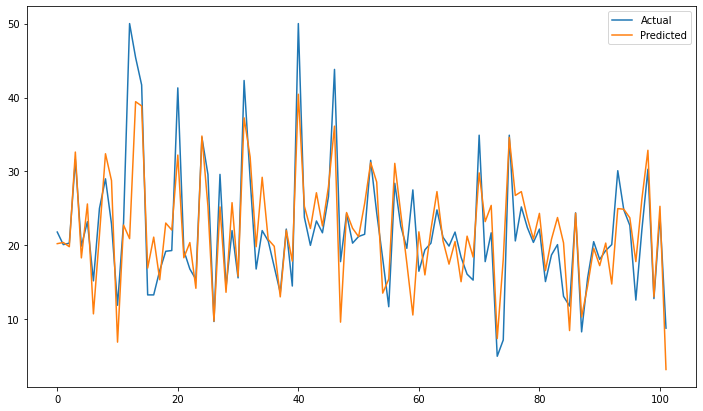

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(y_test.reset_index(drop=True), label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()

In [ ]:
# Error Calculations 
# 1. Error = actual - predicted

# Example 
# Actual | Predicted | Error
#  10    |    15     |  -5
#  10    |     5     |  +5
# ==========================
#                       0 
# ==========================

# 2. Absolute Error = abs(actual  - predicted)
#    

#   MAE - Mean Absolue Error 

# 3. Square Error 
#    (actual - predicted)^2 

# 4. Mean Squared Error 
#    1. (actual - predicted)^2
#    2. mean of all the penalty

In [ ]:
abs(-14), abs(16)

(14, 16)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
((y_test.reset_index(drop=True) - y_pred)**2).mean()

25.13979386460805

In [ ]:
mean_squared_error(y_test, y_pred)

25.13979386460804

In [ ]:
# RMSE - Root Mean Squared Error 
(25.1397)**0.5

5.013950538248259

In [ ]:
mean_absolute_error(y_test, y_pred)

3.3513926950864747

In [ ]:
# The lower the error the better the model! 

In [ ]:
# R2 RSquared 
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test.reset_index(drop=True), y_pred)

0.6570309682401325

In [ ]:
# r2_score ==1 --> Good Model 

In [ ]:
# r2_score - compares the model with the mean of actual data

In [ ]:
# Error Understanding - 
# 1. R2   - Should be used for self comparision whether it is comparable with mean value or not 
# 2. RMSE - If you want to compare different models 
# 3. MAE  - Should to given to BA to explain the cutoff in the house prices